In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
X.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64

#### 方差选择法
- 指定一个阈值，方差小于阈值的列删除掉

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
ts = 5 # 阈值为5
VarianceThreshold(threshold=5).fit_transform(X)[: 5] # type: ignore

array([[  15.6 ,  127.  ,    5.64, 1065.  ],
       [  11.2 ,  100.  ,    4.38, 1050.  ],
       [  18.6 ,  101.  ,    5.68, 1185.  ],
       [  16.8 ,  113.  ,    7.8 , 1480.  ],
       [  21.  ,  118.  ,    4.32,  735.  ]])

In [6]:
var = X.var()
col = var[var > 5].index
X[col]

,alcalinity_of_ash,magnesium,color_intensity,proline
0,15.6,127.0,5.64,1065.0
1,11.2,100.0,4.38,1050.0
2,18.6,101.0,5.68,1185.0
3,16.8,113.0,7.80,1480.0
4,21.0,118.0,4.32,735.0
...,...,...,...,...
173,20.5,95.0,7.70,740.0
174,23.0,102.0,7.30,750.0
175,20.0,120.0,10.20,835.0
176,20.0,120.0,9.30,840.0


#### 相关系数法
- 皮尔逊相关系数大于0.7的认为线性强相关，即特征间有共线性，此时一般二者取其一

In [7]:
corr = X.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [8]:
import seaborn as sns

<Axes: >

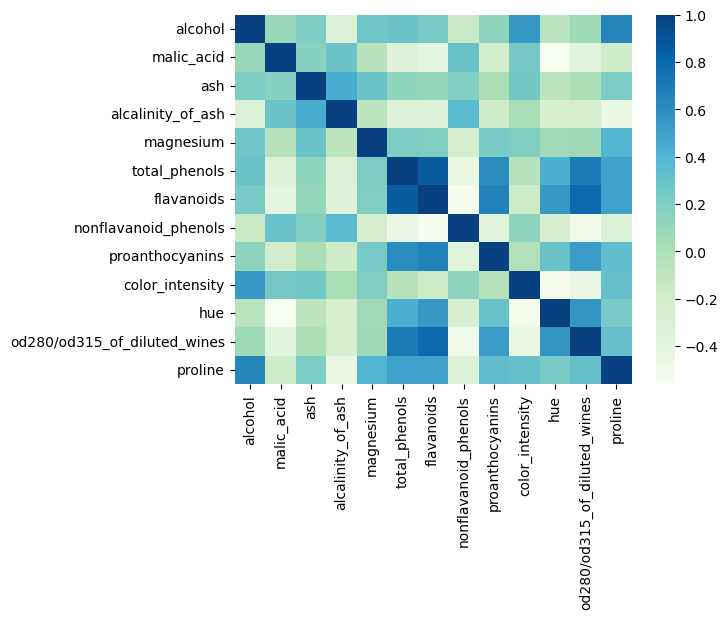

In [9]:
sns.heatmap(corr, cmap='GnBu')

<Axes: >

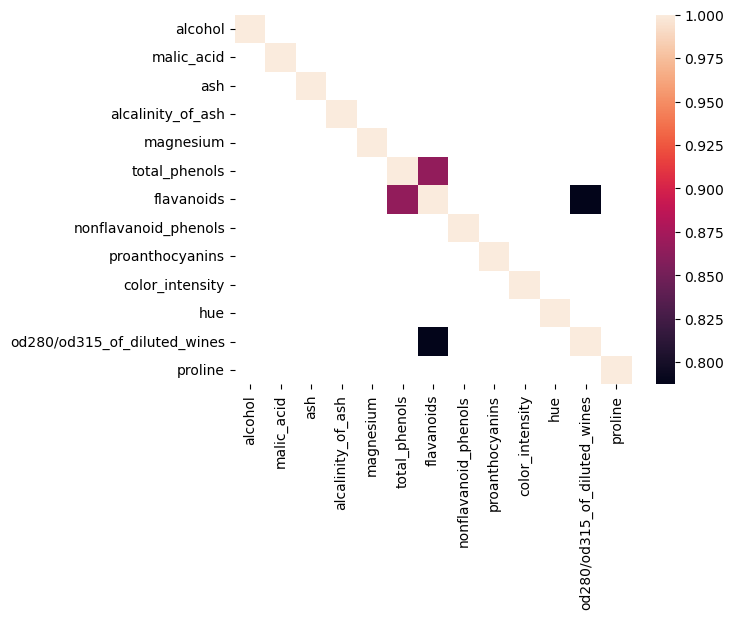

In [10]:
ts = 0.7
mask = corr < ts
sns.heatmap(corr, mask=mask)

#### 卡方检验
- 一般p值小于等于0.05认为统计结果显著

In [11]:
from sklearn.feature_selection import chi2

In [12]:
for col in X.columns:
    score = chi2(X[[col]], y)
    print(f"{col}:\t chi2: {round(score[0][0], 3)}\t p-value: {round(score[1][0], 3)}")

alcohol:	 chi2: 5.445	 p-value: 0.066
malic_acid:	 chi2: 28.069	 p-value: 0.0
ash:	 chi2: 0.743	 p-value: 0.69
alcalinity_of_ash:	 chi2: 29.384	 p-value: 0.0
magnesium:	 chi2: 45.026	 p-value: 0.0
total_phenols:	 chi2: 15.623	 p-value: 0.0
flavanoids:	 chi2: 63.334	 p-value: 0.0
nonflavanoid_phenols:	 chi2: 1.815	 p-value: 0.403
proanthocyanins:	 chi2: 9.368	 p-value: 0.009
color_intensity:	 chi2: 109.017	 p-value: 0.0
hue:	 chi2: 5.183	 p-value: 0.075
od280/od315_of_diluted_wines:	 chi2: 23.39	 p-value: 0.0
proline:	 chi2: 16540.067	 p-value: 0.0


#### 互信息法
- 可以提取非线性关系，但是没有一个明确的阈值

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
for col in X.columns:
    print(f"{col}\t {mutual_info_classif(X[[col]], y).round(3)[0]}")

alcohol	 0.471
malic_acid	 0.274
ash	 0.067
alcalinity_of_ash	 0.246
magnesium	 0.176
total_phenols	 0.411
flavanoids	 0.672
nonflavanoid_phenols	 0.14
proanthocyanins	 0.284
color_intensity	 0.552
hue	 0.459
od280/od315_of_diluted_wines	 0.515
proline	 0.553


#### 递归特征消除法（RFE）

In [15]:
import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [16]:
warnings.filterwarnings('ignore')
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5).fit(X, y) # type:ignore
print(
    rfe.support_, rfe.ranking_
)


[ True False  True False False False  True False False  True False  True
 False] [1 4 1 6 8 7 1 3 5 1 2 1 9]


In [17]:
feature = rfe.get_feature_names_out()
feature

array(['alcohol', 'ash', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X[feature], y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9111111111111111

#### L1正则化

In [21]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import load_diabetes

In [23]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear = LinearRegression().fit(X_train, y_train)
print(linear.score(X_test, y_test), linear.coef_.round(2))

0.4783456657177466 [  20.05 -176.03  474.28  307.47 -290.01  194.73 -210.31  -42.38  597.17
   45.94]


In [25]:
linear = Lasso(alpha=0.1).fit(X_train, y_train)
print(linear.score(X_test, y_test), linear.coef_.round(2))

0.4490642229263656 [   0.    -94.58  468.2   280.72   -0.     -0.   -235.5     0.    450.96
    4.95]


#### 树嵌入

In [40]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [36]:
dt = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
dt.score(X_test, y_test)

0.3047009817209204

In [37]:
dt.feature_importances_

array([0.        , 0.        , 0.27778727, 0.05867568, 0.        ,
       0.04503881, 0.        , 0.        , 0.57353108, 0.04496716])

In [42]:
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 's5 <= -0.004\nsquared_error = 5585.095\nsamples = 331\nvalue = 146.813'),
 Text(0.25, 0.625, 'bmi <= 0.006\nsquared_error = 3026.08\nsamples = 165\nvalue = 107.23'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 's2 <= 0.099\nsquared_error = 2228.396\nsamples = 135\nvalue = 97.37'),
 Text(0.0625, 0.125, 'squared_error = 1942.838\nsamples = 133\nvalue = 95.203'),
 Text(0.1875, 0.125, 'squared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.375, 0.375, 's5 <= -0.045\nsquared_error = 4209.507\nsamples = 30\nvalue = 151.6'),
 Text(0.3125, 0.125, 'squared_error = 1450.667\nsamples = 9\nvalue = 110.667'),
 Text(0.4375, 0.125, 'squared_error = 4366.027\nsamples = 21\nvalue = 169.143'),
 Text(0.75, 0.625, 'bmi <= 0.047\nsquared_error = 5023.421\nsamples = 166\nvalue = 186.157'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'bp <= 0.037\nsquared_error = 4085.555\nsamples = 122\nvalue = 165.951'),
 Text(0.5625, 0.125, 'squared_error = 3659.614\nsamples = 86\nva

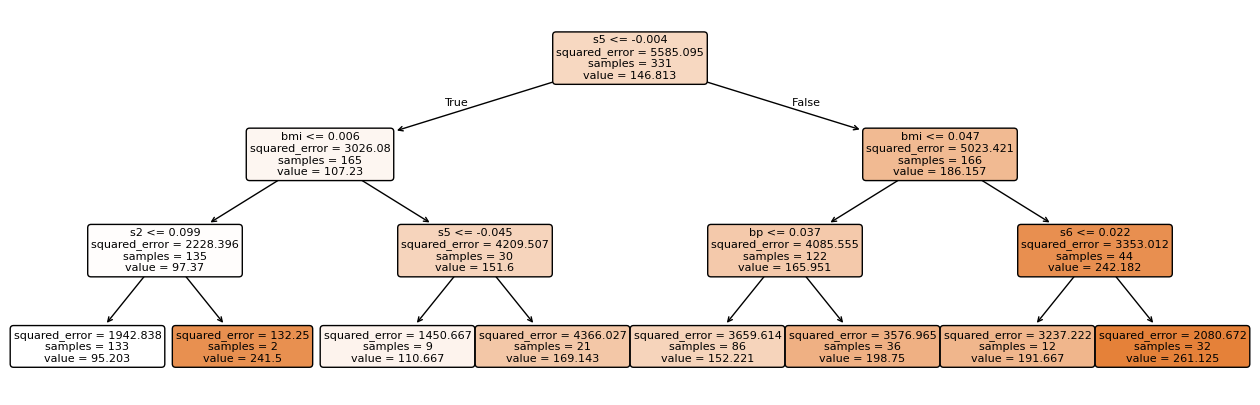

In [45]:
plt.figure(figsize=(16, 5))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, max_depth=3)